In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nikos\AppData\Local\Temp\ipykernel_2476\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import dataset
data = pd.read_csv("housing.csv")
# show dataset before preprocessing
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
# shuffle dataset
data = data.sample(n=len(data))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

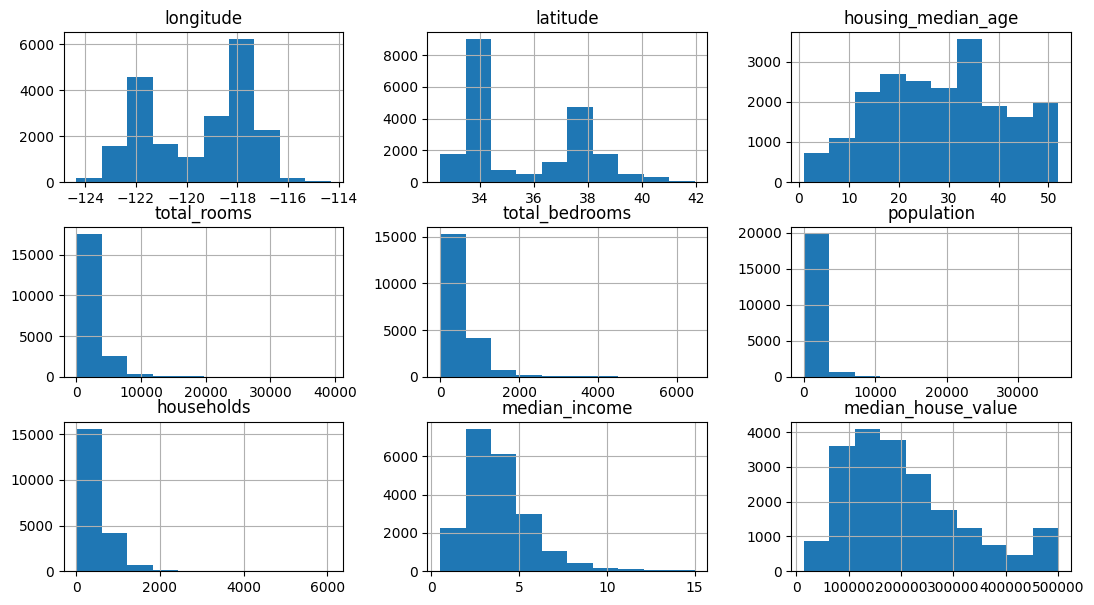

In [4]:
# show histogram before ln
data.hist(figsize=(13,7))

In [5]:
# calculate ln of certain variables
data['total_rooms']= np.log(data['total_rooms']+1)
data['total_bedrooms']= np.log(data['total_bedrooms']+1)
data['population']= np.log(data['population']+1)
data['households']= np.log(data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

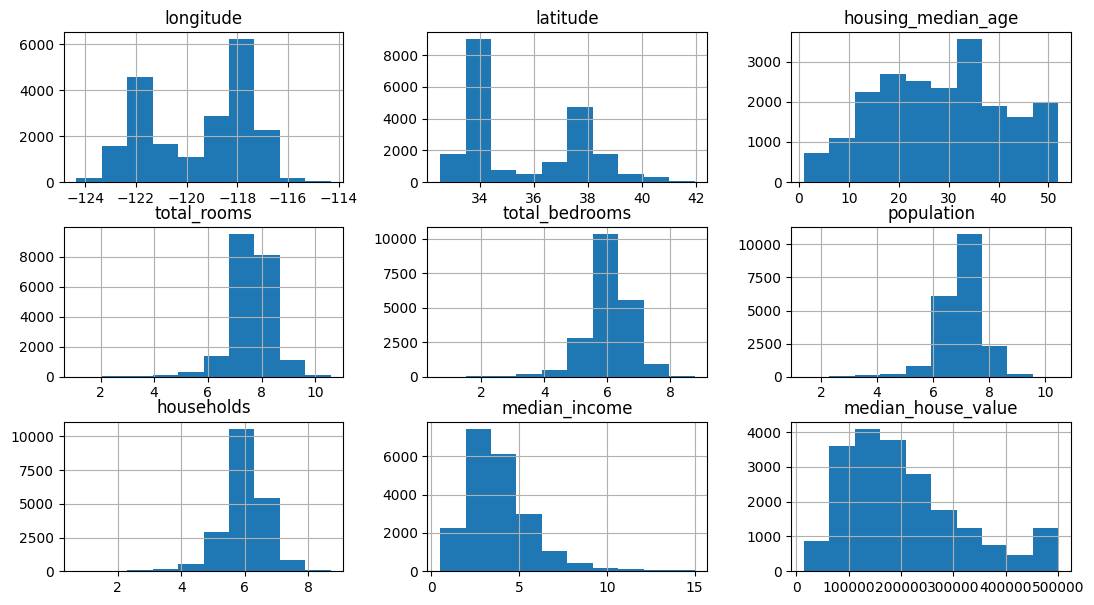

In [6]:
# show histogram after ln
data.hist(figsize=(13,7))

In [7]:
# scale data using standard scaler
from sklearn.preprocessing import StandardScaler
data = pd.DataFrame(data)
columns_to_exclude = ['ocean_proximity']
scaler = StandardScaler()
scaled_data = data.copy()
scaled_data.loc[:, data.columns.difference(columns_to_exclude)] = scaler.fit_transform(data.loc[:, data.columns.difference(columns_to_exclude)])

In [8]:
# one hot vector encoding
scaled_data=scaled_data.join(pd.get_dummies(scaled_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [9]:
# show missing values
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 12739 to 7821
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  bool   
 10  INLAND              20640 non-null  bool   
 11  ISLAND              20640 non-null  bool   
 12  NEAR BAY            20640 non-null  bool   
 13  NEAR OCEAN          20640 non-null  bool   
dtypes: bool(5), float64(9)
memory usage: 2.2 MB


In [10]:
# fill missing values with median
scaled_data['total_bedrooms'] = scaled_data['total_bedrooms'].fillna(scaled_data['total_bedrooms'].median())

In [11]:
#show missing values are filled
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 12739 to 7821
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  bool   
 10  INLAND              20640 non-null  bool   
 11  ISLAND              20640 non-null  bool   
 12  NEAR BAY            20640 non-null  bool   
 13  NEAR OCEAN          20640 non-null  bool   
dtypes: bool(5), float64(9)
memory usage: 2.2 MB


In [12]:
# show dataset after preprocessing
scaled_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12739,-0.888600,1.399006,-0.050812,0.943677,0.861618,0.803789,1.015418,-0.232012,-0.371391,False,True,False,False,False
14769,1.232705,-1.438204,-1.004309,0.356247,0.225526,0.393518,0.263051,-0.063519,-0.520447,False,False,False,False,True
7485,0.678670,-0.801471,0.664310,-0.249969,-0.073335,0.668304,0.046635,-0.677644,-0.642638,True,False,False,False,False
2050,-0.070026,0.514134,-0.765935,0.877232,0.438430,0.467385,0.474760,0.731733,-0.480583,False,True,False,False,False
6629,0.708618,-0.689106,-0.845393,-0.245288,-0.143201,0.367975,0.063275,-1.358882,-0.221468,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,0.598809,-0.731243,1.856182,0.091540,0.037856,-0.303045,-0.043289,0.199670,2.426877,True,False,False,False,False
1312,-1.128183,1.104049,-1.004309,0.466633,0.114239,0.351298,0.183557,0.951285,-0.365324,False,True,False,False,False
2652,-2.226271,2.255788,0.425936,-0.952896,-0.947740,-1.262773,-1.260175,-0.663905,-1.174734,True,False,False,False,False
17448,-0.449365,-0.469058,-0.448103,0.228269,0.117208,0.290283,0.124730,-0.041569,-0.560311,False,False,False,False,True


<Axes: xlabel='longitude', ylabel='latitude'>

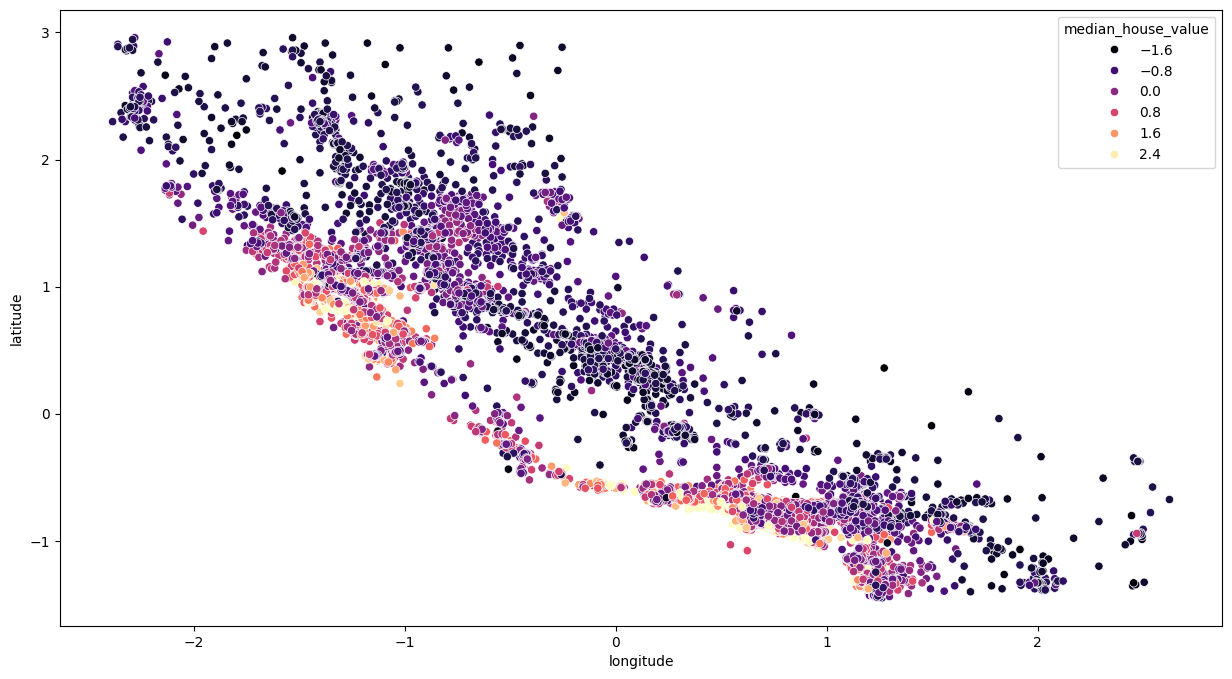

In [13]:
# plot map of california
plt.figure(figsize=(15,8))
sns.scatterplot(x="longitude",y="latitude",data=scaled_data,hue="median_house_value", palette="magma")

<Axes: >

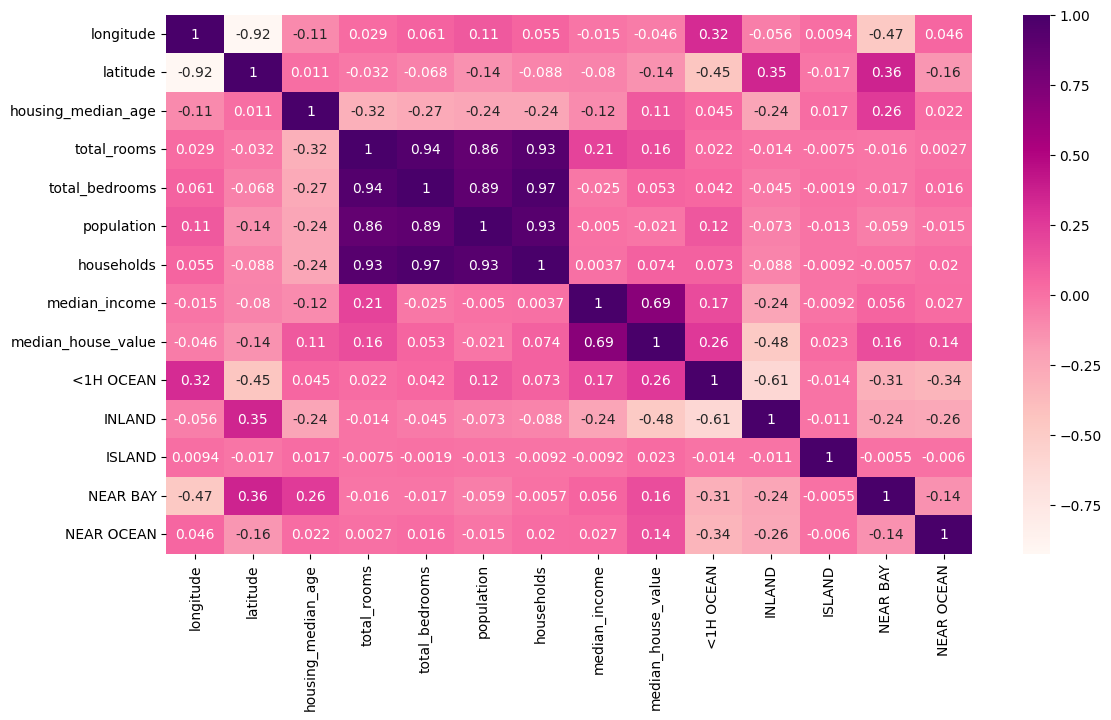

In [14]:
# plot correlation matrix
plt.figure(figsize=(13,7))
sns.heatmap(scaled_data.corr(), annot=True, cmap="RdPu")